In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from docx import Document

## Load data

In [3]:
# Load the SPSS file for survey data
survey_data, meta = pyreadstat.read_sav('part2_data.sav')

# Load the Excel file for the brand list
brand_list = pd.read_excel('part2_brandlist.xlsx')

In [17]:
survey_data.head(10)

,CID,STATUS,TERMINATION_CODE,LOCALE,Country,S01,S02_1,AgeGroups,S03axUS,S03axZA,...,P02b_10_98,P02b_10_105,P02b_10_99,P02b_10_100,P02b_10_101,P02b_10_102,P02b_10_103,P02b_10_999,P02b_10_997,P02b_10_998
0,699882399.0,3.0,2228716.0,5.0,5.0,2.0,48.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,699882401.0,2.0,NaN,5.0,5.0,2.0,43.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,699882425.0,3.0,2226504.0,5.0,5.0,2.0,30.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,699882433.0,2.0,NaN,5.0,5.0,1.0,39.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,699882439.0,3.0,2228716.0,5.0,5.0,1.0,46.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,699882567.0,2.0,NaN,5.0,5.0,1.0,48.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,699882613.0,2.0,NaN,5.0,5.0,2.0,36.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,699883000.0,2.0,NaN,5.0,5.0,1.0,40.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,699890233.0,2.0,NaN,5.0,5.0,2.0,43.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,699890263.0,2.0,NaN,5.0,5.0,1.0,43.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
brand_list.head()

,Unnamed: 0,Unnamed: 1,BRAND TO SHOW,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,IS PRIORITY BRAND,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Code,Category,USA,South Africa,Germany,Spain,UK,Poland,China,USA,South Africa,Germany,Spain,UK,Poland,China
1,1,Spirit,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,Spirit,0,0,1,1,0,1,1,0,0,1,1,0,1,1
3,3,Liqueur,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,4,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [8]:
# Load the Word document
questionnaire = Document('part2_questionnaire.docx')

# Print the content of each paragraph to inspect the structure
for paragraph in questionnaire.paragraphs:
    print(paragraph.text)




Screener (S)
Introduction
Thank you for taking the time to participate in this market research study.

Please be assured that your responses will remain confidential and anonymous.


S01: Gender
All. Single.
What is your gender?

Female
Male
Other
Prefer not to answer

Screenout at end of screener if Pos. 4 selected.

S02: Age
All. Numeric. Max. 2 digit-number.
How old are you?

___

If answer to above question as follows, terminate directly
DE, UK, ES, POL, CN, ZA: <18
US: <21
If answer to above question > 39, Terminate at end of screener in ES, POL, CN, ZA
If answer to above question > 49, Terminate at end of screener in DE, US, UK. Quota limit of 20% for 40-49.

Age Groups (Hidden)
Auto-code from S02a.

18-29 years
30-39 years
40-49 years (show only in DE, US, UK)

S03a: Region
All. Single.
In which region do you live?

List “Region” from NativeResearch 

CN: only Tier 1 & Tier 2 regions

S03a-recode: Region (Hidden, mapping)
Broader regions acc. to excel.

S03b: Area of living
Al

## Completeness and Accuracy Check

In [11]:
missing_data = survey_data.isnull().sum()

In [14]:
missing_data

CID                   0
STATUS                0
TERMINATION_CODE     66
LOCALE                0
Country               0
                   ... 
P02b_10_102         181
P02b_10_103         181
P02b_10_999         181
P02b_10_997         181
P02b_10_998         181
Length: 1842, dtype: int64

In [12]:
print("Missing Data in Required Fields:")
print(missing_data[missing_data > 0])

Missing Data in Required Fields:
TERMINATION_CODE     66
AgeGroups             4
S03axUS             181
S03axZA             181
S03axDE             181
                   ... 
P02b_10_102         181
P02b_10_103         181
P02b_10_999         181
P02b_10_997         181
P02b_10_998         181
Length: 1836, dtype: int64


In [18]:
# Calculate the percentage of missing values for required questions
missing_percentage = survey_data.isnull().mean() * 100
print("Percentage of Missing Data in Required Questions:")
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

Percentage of Missing Data in Required Questions:


P02b_2_54    100.000000
P02b_1_76    100.000000
P02b_4_93    100.000000
P02b_4_92    100.000000
P02b_4_91    100.000000
                ...    
S05            2.209945
AgeGroups      2.209945
S03axGB        2.209945
S04xGB         2.209945
S03b           2.209945
Length: 1836, dtype: float64

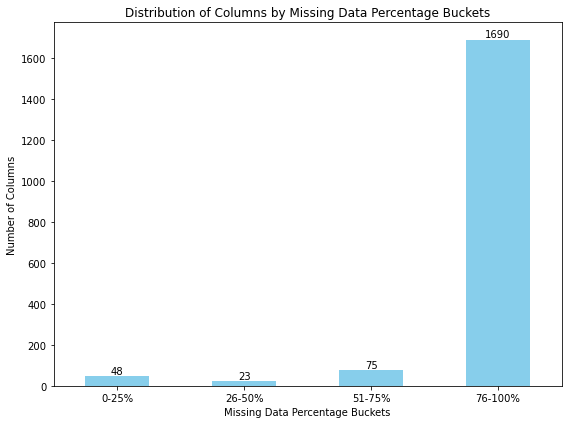

In [22]:
missing_buckets = pd.cut(missing_percentage, bins=[0, 25, 50, 75, 100], labels=['0-25%', '26-50%', '51-75%', '76-100%'])

# Count the number of columns in each bucket
bucket_counts = missing_buckets.value_counts().sort_index()

# Plot the distribution of missing data buckets
plt.figure(figsize=(8, 6))
ax = bucket_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Columns by Missing Data Percentage Buckets')
plt.xlabel('Missing Data Percentage Buckets')
plt.ylabel('Number of Columns')
plt.xticks(rotation=0)
# Add count labels on top of each bar
for i, count in enumerate(bucket_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [35]:
missing_percentage.sort_values(ascending=False).head(10)

P02b_10_998    100.0
P02b_3_65      100.0
P02b_3_76      100.0
P02b_3_74      100.0
P02b_3_73      100.0
P02b_3_72      100.0
P02b_3_71      100.0
P02b_3_69      100.0
P02b_3_68      100.0
P02b_3_67      100.0
dtype: float64

In [36]:
missing_percentage[missing_percentage.index.str.startswith('P02b')].count()

1080

In [37]:
missing_percentage[missing_percentage.index.str.startswith('P02a')].count()

108

**Key Observations from the Questionnaire**

Conditional and Skipped Sections:

**S08a Condition**: This variable determines whether respondents are categorized as only drinkers, only purchasers, both, or neither. Based on this categorization, certain questions are skipped:
P02a and P02b (Brand performance - price and non-price loops) are skipped for "only drinkers" (when S08a = 2).
Other sections also have conditional logic based on responses in prior questions.
Screeners:

**The screener section (S01-S05)** contains specific criteria for terminating respondents based on their demographics or purchasing habits. For example:
S01 Gender: If a respondent selects "Prefer not to answer," they’re screened out.
S02 Age: Specific age limits for countries, with screenouts if respondents are outside these limits.
Loops and Follow-up Questions:

**P02a and P02b** are looped for selected brands (up to 5) based on choices in S10 (Brand Consideration). This means not every respondent will have data in these fields, depending on the number of brands considered.
Demographic and Behavioral Segmentation:

**The demographic section (D01-D07)** captures household size, employment, education, and behavioral changes in response to inflation. These questions are essential for segmenting respondents and may impact filtering if values are missing.
Special Categories:

Some questions are multi-choice with exclusive options, such as "None" or "Prefer not to answer." For instance:
S09 (Brand Awareness): Respondents can select "None" or "Other," which are exclusive.
S13 (Brand Rejection): Contains a follow-up question S13a if a specific brand (e.g., CLIENT BRAND) is rejected.
Implications for Data Quality Checks
Given these observations, here’s how they guide the quality checks:

**Conditional Logic Validation:**

High missing values in P02a and P02b may be due to the S08a = 2 condition, meaning "only drinkers" skip these questions. For data quality, missing values here should not be considered an issue if they align with this conditional logic.
Completeness in Screener and Demographic Data:

Required Responses: Ensure that screener questions (S01-S05) and demographics (D01-D07) are complete for all respondents, as these fields determine eligibility and segmentation.
Terminations and Screenouts: Verify that respondents who should be terminated based on the screener criteria are actually excluded from the dataset.
Loop and Multi-Select Responses:

For looped questions like P02a and P02b, check that responses are present only for brands selected in S10. Missing values here can be expected if fewer than 5 brands were considered.
Exclusive Options: Ensure that responses with options like "None" or "Prefer not to answer" are handled correctly, as these can impact the validity of other responses in the same question.
Logical Flow Consistency:

Ensure that follow-up questions are answered only when applicable (e.g., S13a only if a specific brand is rejected in S13).


### Conditional Logic: P02a and P02b should be skipped if S08a=2